In [1]:
%matplotlib inline
import os

import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [11]:
ls desta_sac_final

 Volume in drive C is SystemDisk
 Volume Serial Number is 76A7-58F4

 Directory of C:\Users\t80055550\Desktop\SAFETY-GYM\desta_sac_final

10/05/2021  04:22 PM    <DIR>          .
10/05/2021  04:22 PM    <DIR>          ..
10/04/2021  09:33 AM    <DIR>          0.99_5_64_4_0.01_0.01_0
10/04/2021  11:26 AM    <DIR>          0.99_5_64_4_0.01_0.05_0
10/04/2021  11:27 AM    <DIR>          0.99_5_64_4_0.01_0.1_0
10/04/2021  11:27 AM    <DIR>          0.99_5_64_4_0.01_0.2_0
10/04/2021  11:27 AM    <DIR>          0.99_5_64_4_0.01_0.3_0
10/04/2021  11:26 AM    <DIR>          0.99_5_64_4_0.01_0.5_0
10/04/2021  11:27 AM    <DIR>          0.99_5_64_4_0.01_0.5_10000
10/04/2021  11:27 AM    <DIR>          0.99_5_64_4_0.01_0.5_100000
10/04/2021  11:27 AM    <DIR>          0.99_5_64_4_0.01_0.5_75000
10/04/2021  09:33 AM    <DIR>          0.99_5_64_4_0.01_1_0
10/04/2021  09:35 AM    <DIR>          0.99_5_64_4_0_0.0001_0
10/04/2021  09:35 AM    <DIR>          0.99_5_64_4_0_0.001_0
10/04/2021  09:35 AM   

In [2]:
def load_safety_starter_agents(
    d_experiment_runs:str
) -> pd.DataFrame:
    '''
        Loads files of runs into a single pandas dataframe.
        Arguments:
            d_experiment_runs - path to directory containing run results
            
        Returns:
            experiment_results_df - Dataframe of results of all runs
    '''
    experiment_results_df = None
    runs = os.listdir(d_experiment_runs)
    for run_idx, d_run in enumerate(runs):
        if experiment_results_df is None:
            experiment_results_df = pd.read_csv(
                os.path.join(d_experiment_runs, d_run, 'progress.txt'),
                sep='\t'
            )
            experiment_results_df['run'] = run_idx
        else:
            run_df = pd.read_csv(
                os.path.join(d_experiment_runs, d_run, 'progress.txt'),
                sep='\t'
            )
            run_df['run'] = run_idx
            experiment_results_df = \
                pd.concat([experiment_results_df, run_df], axis=0, ignore_index=True)
    experiment_results_df = experiment_results_df.rename(
        columns={
            'AverageEpCost': 'AverageTestEpCost', 
            'AverageEpRet': 'AverageTestEpRet'}
    )

    return experiment_results_df

In [3]:
def load_wcsac(
    d_experiment_runs:str
) -> pd.DataFrame:
    '''
        Loads files of runs into a single pandas dataframe.
        Arguments:
            experiment_runs_directory - path to directory containing run results
            
        Returns:
            experiment_results_df - Dataframe of results of all runs
    '''
    experiment_results_df = None
    runs = os.listdir(d_experiment_runs)
    for run_idx, d_run in enumerate(runs):
        if experiment_results_df is None:
            experiment_results_df = pd.read_csv(
                os.path.join(d_experiment_runs, d_run, 'progress.txt'),
                sep='\t'
            )
            experiment_results_df['run'] = run_idx
        else:
            run_df = pd.read_csv(
                os.path.join(d_experiment_runs, d_run, 'progress.txt'),
                sep='\t'
            )
            run_df['run'] = run_idx
            experiment_results_df = \
                pd.concat([experiment_results_df, run_df], axis=0, ignore_index=True)

    return experiment_results_df

In [4]:
def load_desta(
    d_experiment_runs:str
) -> pd.DataFrame:
    '''
        Loads files of runs into a single pandas dataframe.
        Arguments:
            d_experiment_runs - path to directory containing run results
            
        Returns:
            experiment_results_df - Dataframe of results of all runs
    '''
    experiment_results_df = None
    runs = os.listdir(d_experiment_runs)
    for run_idx, d_run in enumerate(runs):
        if experiment_results_df is None:
            experiment_results_df = pd.read_csv(
                os.path.join(d_experiment_runs, d_run, 'results.csv')
            )
            experiment_results_df['run'] = run_idx
        else:
            run_df = pd.read_csv(
                os.path.join(d_experiment_runs, d_run, 'results.csv')
            )
            run_df['run'] = run_idx
            experiment_results_df = \
                pd.concat([experiment_results_df, run_df], axis=0, ignore_index=True)
    experiment_results_df = experiment_results_df.rename(
        columns={
            'step':'TotalEnvInteracts',
            ' mean_evaluation_return':'AverageTestEpRet', 
            ' mean_evaluation_cost':'AverageTestEpCost',
            ' cumulative_training_cost':'CumulativeCost'
    })
    
    return experiment_results_df

In [5]:
def load_pid(
        experiment_dir:str
    ) -> pd.DataFrame:
    
    '''
        Loads files of runs into a single pandas dataframe.
        
        Arguments:
            d_experiment_runs - path to directory containing run results
            
        Returns:
            experiment_results_df - Dataframe of results of all runs
    '''
    
    experiment_df = None
    run_dirs = os.listdir(experiment_dir)

    for run_idx, run_dir in enumerate(run_dirs):
        try:
            if experiment_df is None:
                experiment_df = pd.read_csv(
                    os.path.join(experiment_dir, run_dir, 'progress.csv')
                )
                experiment_df['run'] = run_idx
            else:
                run_df = pd.read_csv(
                    os.path.join(experiment_dir, run_dir, 'progress.csv')
                )
                run_df['run'] = run_idx
                experiment_df = \
                    pd.concat([experiment_df, run_df], axis=0, ignore_index=True)
        except:
            continue
    
    experiment_df = experiment_df[['Diagnostics/NewCompletedTrajs', 'Diagnostics/CumSteps', 'ReturnAverage', 'CostAverage', 'run']]
    experiment_df['CumulativeCost'] = experiment_df['Diagnostics/NewCompletedTrajs'] * experiment_df['CostAverage']
    experiment_df['CumulativeCost'] = experiment_df['CumulativeCost'].cumsum()
    experiment_df = experiment_df.rename(
        columns={
            'Diagnostics/CumSteps':'TotalEnvInteracts',
            'ReturnAverage':'AverageTestEpRet', 
            'CostAverage':'AverageTestEpCost',
    })
    
    return experiment_df

In [6]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

set_size(5.5 * 72.27)

(5.499999999999999, 3.3991869381244215)

In [7]:
# Prettify Plots
# plt.tight_layout()
sns.set_style("ticks")
sns.set_context("paper")
tex_fonts = {
    
    # Use LaTeX to write all text
    "font.family": "serif",
#     'font.sans-serif': 'DejaVu Sans'
    
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 14,
    "axes.labelpad":-1,
    "font.size": 14,
    'axes.titlesize':'large',

    
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14
}

plt.rcParams.update(tex_fonts)

Ours
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
CPO
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
TRPO


<ipython-input-45-667a4927759a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)
<ipython-input-45-667a4927759a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)
<ipython-input-4

AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
TRPO-L


<ipython-input-45-667a4927759a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)


AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
WCSAC
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


<ipython-input-45-667a4927759a>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)


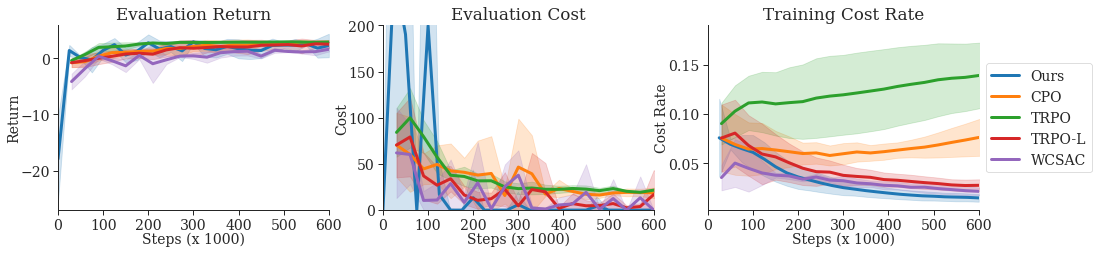

In [45]:
def plot(experiments:str):
    '''
        Plots mean+standard deviation curves of episode reward and accumulated cost.

        Arguments:
            experiments - list of tuples [(exp1_data_dir, exp1_name),...]
            Note: exp_data_dir should be a directory containing csv 
                  files of each run.
                  
                  exp_data_dir
                      |_run1.csv
                      |_run2.csv
                      |_run3.csv
                      :
        Returns:
            None
    '''


    fig, axes = plt.subplots(1, 3, figsize=(5.499999999999999 * 3, 3.3991869381244215))
    (ax_test_ret, ax_test_cost, ax_cum_cost) =  axes
    for _, (exp_data_dir, exp_name) in enumerate(experiments):
        print(exp_name)
        if exp_name in ['WCSAC']:
            exp_data = load_wcsac(exp_data_dir)
        elif exp_name in ['Ours', 'DESTA', 'DESTA1', 'DESTA2', 'DESTA3']:
            exp_data = load_desta(exp_data_dir)
        elif exp_name == 'PID-Lagrangian':
            exp_data = load_pid(exp_data_dir)
        else:
            exp_data = load_safety_starter_agents(exp_data_dir)
    

        exp_data['TotalEnvInteracts'] /= 1000
        test_returns_data = exp_data[['TotalEnvInteracts', 'AverageTestEpRet', 'run']]
        test_safety_violations_data = exp_data[['TotalEnvInteracts', 'AverageTestEpCost', 'run']]
        cumulative_safety_violations_data = exp_data[['TotalEnvInteracts', 'CumulativeCost', 'run']]
        cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)
        if exp_name == 'PID-Lagrangian':
            cumulative_safety_violations_data['CostRate'] -= 0.25

        
        ret_plt = sns.lineplot(x='TotalEnvInteracts', y='AverageTestEpRet', data=test_returns_data, ci='sd',  linewidth=3,label=f'{exp_name}', ax=ax_test_ret)
        ret_plt.set(xlim=(0, 600))
#         ret_plt.set(ylim=(-4, 4))
        ret_plt.set(xlabel='Steps (x 1000)')
        ret_plt.set(ylabel='Return')
        ret_plt.set_title('Evaluation Return')

        ax_test_ret.get_legend().remove()


        cost_plt = sns.lineplot(x='TotalEnvInteracts', y='AverageTestEpCost', data=test_safety_violations_data, ci='sd',  linewidth=3, label=f'{exp_name}', ax=ax_test_cost)
        cost_plt.set(xlim=(0, 600))
        cost_plt.set(ylim=(0, 200))
        cost_plt.set(xlabel='Steps (x 1000)')
        cost_plt.set(ylabel='Cost')
        cost_plt.set_title('Evaluation Cost')
        ax_test_cost.get_legend().remove()

        cum_cost_plt = sns.lineplot(x='TotalEnvInteracts', y='CostRate', data=cumulative_safety_violations_data, ci='sd', linewidth=3, label=f'{exp_name}', ax=ax_cum_cost)
        cum_cost_plt.set(xlim=(0, 600))
#         cum_cost_plt.set(ylim=(0, 0.1))
        cum_cost_plt.set(xlabel='Steps (x 1000)')
        cum_cost_plt.set(ylabel='Cost Rate')
        cum_cost_plt.set_title('Training Cost Rate')
        box = ax_cum_cost.get_position()
        

        ax_cum_cost.set_position([box.x0, box.y0, box.width, box.height])

        # Put a legend to the right of the current axis
        ax_cum_cost.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        
        for _, ax in enumerate(axes):
            print(ax)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
#             ax.set_xlim((0, 60000))
#             ax.set_ylim((0, 1.0))
#             ax.set_xlabel('Steps')
#             ax.set_ylabel('Win Rate')
  
#     plt.show()
    fig.savefig('StaticEnv_1.pdf', format='pdf', bbox_inches='tight')

if __name__ == '__main__':
    df = plot(zip(
    [
#         './DESTA/StaticEnv-v0/0.99_5_32_4/',
#         './DESTA/DynamicEnv/0.99_5_64_4_0.01_0.5_0/',
#         './DESTA/StaticEnv-v0/0.99_5_64_4_0_0.1_0/',
#     './desta_sac_final/0.99_5_64_4_0_0.01_10000',
# './desta_sac_final/0.99_5_64_4_0_0.01_100000',
'./desta_sac_final/0.99_5_64_4_1_0.1_0',

#         './DESTA/StaticEnv-v0/0.99_5_64_4_0_0.01_50000/',
#         './DESTA/StaticEnv-v0/0.99_5_64_4_0_0.1_0',
        './PPO_TRPO_PPO-L_TRPO-L_CPO/StaticEnv-v0/2021-09-29_cpo_PointGoal1/',
#         './data/local/20211001/061441/PointGoal_Ki_Kp/DynamicEnv-v0/2500000.0steps_25clim/0.0001Ki/1Kp/0.95dltpema/',
#         './PPO_TRPO_PPO-L_TRPO-L_CPO/StaticEnv-v0/2021-09-28_ppo_PointGoal1/',
#         './PPO_TRPO_PPO-L_TRPO-L_CPO/StaticEnv-v0/2021-09-29_ppo_lagrangian_PointGoal1/',
        './PPO_TRPO_PPO-L_TRPO-L_CPO/StaticEnv-v0/2021-09-29_trpo_PointGoal1/',
        './PPO_TRPO_PPO-L_TRPO-L_CPO/StaticEnv-v0/2021-09-29_trpo_lagrangian_PointGoal1/',
        './WCSAC/StaticEnv-v0/',
        
# './desta_sac_final/0.99_5_64_4_0.01_0.01_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.05_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.1_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.2_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.3_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.5_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.5_10000',
# './desta_sac_final/0.99_5_64_4_0.01_0.5_100000',
# './desta_sac_final/0.99_5_64_4_0.01_0.5_75000',
# './desta_sac_final/0.99_5_64_4_0.01_1_0',
# './desta_sac_final/0.99_5_64_4_0_0.0001_0',
# './desta_sac_final/0.99_5_64_4_0_0.001_0',
# './desta_sac_final/0.99_5_64_4_0_0.01_10000',
# './desta_sac_final/0.99_5_64_4_0_0.01_100000',
# './desta_sac_final/0.99_5_64_4_0_0.01_25000',
# './desta_sac_final/0.99_5_64_4_0_0.01_50000',
# './desta_sac_final/0.99_5_64_4_0_0.01_75000',
# './desta_sac_final/0.99_5_64_4_0_1_0',
# './desta_sac_final/0.99_5_64_4_1_0.1_0',
# './desta_sac_final/0.99_5_64_4_100_0.1_0',
        
    ],
    [
#         'DESTA',
#         'Ours',
#                 'Ours',
#         'Ours',
        'Ours',

#         'DESTA2',
#         'DESTA3',
        'CPO',
#         'PID-Lagrangian',
#         'PPO',
#         'PPO-Lagrangian',
        'TRPO',
        'TRPO-L',
        'WCSAC',
#         './desta_sac_final/0.99_5_64_4_0.01_0.01_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.05_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.1_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.2_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.3_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.5_0',
# './desta_sac_final/0.99_5_64_4_0.01_0.5_10000',
# './desta_sac_final/0.99_5_64_4_0.01_0.5_100000',
# './desta_sac_final/0.99_5_64_4_0.01_0.5_75000',
# './desta_sac_final/0.99_5_64_4_0.01_1_0',
# './desta_sac_final/0.99_5_64_4_0_0.0001_0',
# './desta_sac_final/0.99_5_64_4_0_0.001_0',
# './desta_sac_final/0.99_5_64_4_0_0.01_10000',
# './desta_sac_final/0.99_5_64_4_0_0.01_100000',
# './desta_sac_final/0.99_5_64_4_0_0.01_25000',
# './desta_sac_final/0.99_5_64_4_0_0.01_50000',
# './desta_sac_final/0.99_5_64_4_0_0.01_75000',
# './desta_sac_final/0.99_5_64_4_0_1_0',
# './desta_sac_final/0.99_5_64_4_1_0.1_0',
# './desta_sac_final/0.99_5_64_4_100_0.1_0',
    ]))

Ours
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
CPO
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
TRPO


<ipython-input-52-6f3af05832c6>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)
<ipython-input-52-6f3af05832c6>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)
<ipython-input-5

AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
TRPO-L
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)
WCSAC
AxesSubplot(0.125,0.125;0.227941x0.755)
AxesSubplot(0.398529,0.125;0.227941x0.755)
AxesSubplot(0.672059,0.125;0.227941x0.755)


<ipython-input-52-6f3af05832c6>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)
<ipython-input-52-6f3af05832c6>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)


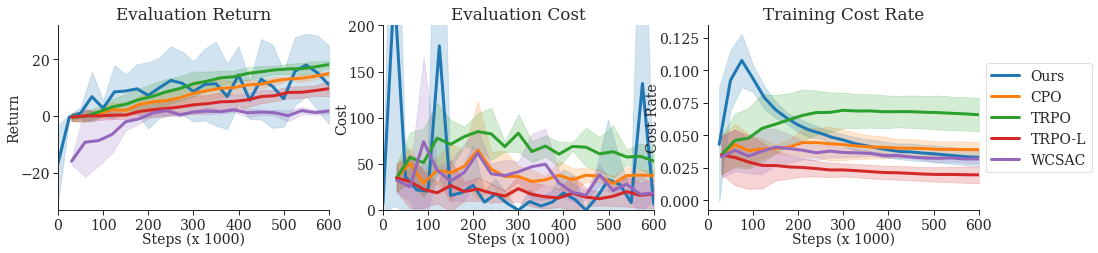

In [52]:
def plot(experiments:str):
    '''
        Plots mean+standard deviation curves of episode reward and accumulated cost.

        Arguments:
            experiments - list of tuples [(exp1_data_dir, exp1_name),...]
            Note: exp_data_dir should be a directory containing csv 
                  files of each run.
                  
                  exp_data_dir
                      |_run1.csv
                      |_run2.csv
                      |_run3.csv
                      :
        Returns:
            None
    '''


    fig, axes = plt.subplots(1, 3, figsize=(5.499999999999999 * 3, 3.3991869381244215))
    (ax_test_ret, ax_test_cost, ax_cum_cost) =  axes
    for _, (exp_data_dir, exp_name) in enumerate(experiments):
        print(exp_name)
        if exp_name in ['WCSAC']:
            exp_data = load_wcsac(exp_data_dir)
        elif exp_name in ['Ours', 'DESTA', 'DESTA1', 'DESTA2', 'DESTA3']:
            exp_data = load_desta(exp_data_dir)
        elif exp_name == 'PID-Lagrangian':
            exp_data = load_pid(exp_data_dir)
        else:
            exp_data = load_safety_starter_agents(exp_data_dir)
#         exp_data = load_desta(exp_data_dir)


        exp_data['TotalEnvInteracts'] /= 1000
        test_returns_data = exp_data[['TotalEnvInteracts', 'AverageTestEpRet', 'run']]
        test_safety_violations_data = exp_data[['TotalEnvInteracts', 'AverageTestEpCost', 'run']]
        cumulative_safety_violations_data = exp_data[['TotalEnvInteracts', 'CumulativeCost', 'run']]
        cumulative_safety_violations_data['CostRate'] = cumulative_safety_violations_data['CumulativeCost'] / (cumulative_safety_violations_data['TotalEnvInteracts'] * 1000)
        if exp_name == 'PID-Lagrangian':
            cumulative_safety_violations_data['CostRate'] -= 0.25

        
        ret_plt = sns.lineplot(x='TotalEnvInteracts', y='AverageTestEpRet', data=test_returns_data, ci='sd',  linewidth=3,label=f'{exp_name}', ax=ax_test_ret)
        ret_plt.set(xlim=(0, 600))
#         ret_plt.set(ylim=(-4, 4))
        ret_plt.set(xlabel='Steps (x 1000)')
        ret_plt.set(ylabel='Return')
        ret_plt.set_title('Evaluation Return')

        ax_test_ret.get_legend().remove()


        cost_plt = sns.lineplot(x='TotalEnvInteracts', y='AverageTestEpCost', data=test_safety_violations_data, ci='sd',  linewidth=3, label=f'{exp_name}', ax=ax_test_cost)
        cost_plt.set(xlim=(0, 600))
        cost_plt.set(ylim=(0, 200))
        cost_plt.set(xlabel='Steps (x 1000)')
        cost_plt.set(ylabel='Cost')
        cost_plt.set_title('Evaluation Cost')
        ax_test_cost.get_legend().remove()

        cum_cost_plt = sns.lineplot(x='TotalEnvInteracts', y='CostRate', data=cumulative_safety_violations_data, ci='sd', linewidth=3, label=f'{exp_name}', ax=ax_cum_cost)
        cum_cost_plt.set(xlim=(0, 600))
#         cum_cost_plt.set(ylim=(0, 0.1))
        cum_cost_plt.set(xlabel='Steps (x 1000)')
        cum_cost_plt.set(ylabel='Cost Rate')
        cum_cost_plt.set_title('Training Cost Rate')
        box = ax_cum_cost.get_position()
        

        ax_cum_cost.set_position([box.x0, box.y0, box.width, box.height])

        # Put a legend to the right of the current axis
        ax_cum_cost.legend(loc='center left', bbox_to_anchor=(1, 0.5))

        
        for _, ax in enumerate(axes):
            print(ax)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
#             ax.set_xlim((0, 60000))
#             ax.set_ylim((0, 1.0))
#             ax.set_xlabel('Steps')
#             ax.set_ylabel('Win Rate')
  
#     plt.show()
    fig.savefig('DynamicEnv_1.pdf', format='pdf', bbox_inches='tight')

if __name__ == '__main__':
    df = plot(zip(
    [
#         './DESTA/DynamicEnv/0.99_5_64_4_0.01_0.5_0/',
        './dyn_desta_sac_final/0.99_5_64_4_0.01_0.3_0',
#         './DESTA/StaticEnv-v0/0.99_5_64_4_0_0.01_50000/',
#         './DESTA/StaticEnv-v0/0.99_5_64_4_0_0.1_0',
        './PPO_TRPO_PPO-L_TRPO-L_CPO/DynamicEnv-v0/2021-09-29_cpo_PointGoal1/',
#         './data/local/20211001/061441/PointGoal_Ki_Kp/DynamicEnv-v0/2500000.0steps_25clim/0.0001Ki/1Kp/0.95dltpema/',
#         './PPO_TRPO_PPO-L_TRPO-L_CPO/StaticEnv-v0/2021-09-28_ppo_PointGoal1/',
#         './PPO_TRPO_PPO-L_TRPO-L_CPO/StaticEnv-v0/2021-09-29_ppo_lagrangian_PointGoal1/',
        './PPO_TRPO_PPO-L_TRPO-L_CPO/DynamicEnv-v0/2021-09-29_trpo_PointGoal1/',
        './PPO_TRPO_PPO-L_TRPO-L_CPO/DynamicEnv-v0/2021-09-29_trpo_lagrangian_PointGoal1/',
        './WCSAC/DynamicEnv-v0/',
        
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.01_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.05_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.1_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.2_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.3_0',
# # './dyn_desta_sac_final/0.99_5_64_4_0.01_0.4_0',
# # './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_0',
# # './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_10000',
# # './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_100000',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_25000',
# # './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_50000',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_75000',
    ],
    [
#         'DESTA',
#         'Ours',
#                 'Ours',
#         'Ours',
        'Ours',

#         'DESTA2',
#         'DESTA3',
        'CPO',
#         'PID-Lagrangian',
#         'PPO',
#         'PPO-Lagrangian',
        'TRPO',
        'TRPO-L',
        'WCSAC',
#         './desta_sac_final/0.99_5_64_4_0.01_0.01_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.01_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.05_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.1_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.2_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.3_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.4_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_0',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_10000',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_100000',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_25000',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_50000',
# './dyn_desta_sac_final/0.99_5_64_4_0.01_0.5_75000',
    ]))